<a href="https://colab.research.google.com/github/Neel12-coder/Data-Analysis/blob/main/Cryptocurrencies_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import requests

In [2]:
def get_historic_price(symbol, exchange='bitfinex', after='2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
         exchange=exchange,symbol=symbol)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

In [3]:
#to get data of last to last week
last_week = (pd.Timestamp.now() - pd.offsets.Day(14))
last_week

Timestamp('2022-02-26 06:33:21.560927')

In [4]:
btc = get_historic_price('btc', 'bitstamp', after=last_week)

In [5]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-02-26 07:00:00,39040.81,39247.96,39027.33,39163.28,29.522115,1.156164e+06
2022-02-26 08:00:00,39178.00,39240.47,38979.77,39227.40,30.429355,1.191532e+06
2022-02-26 09:00:00,39219.53,39559.22,38695.24,38792.49,57.297222,2.236784e+06
2022-02-26 10:00:00,38766.97,38946.63,38600.00,38822.90,22.874845,8.859174e+05
2022-02-26 11:00:00,38798.06,39109.76,38798.06,39034.10,21.263125,8.295675e+05


In [6]:
eth = get_historic_price(symbol='eth',exchange='bitstamp',after=last_week)

In [7]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-02-26 07:00:00,2777.75,2792.55,2777.75,2779.96,90.181525,2.510643e+05
2022-02-26 08:00:00,2781.20,2792.15,2759.48,2791.19,259.357454,7.190108e+05
2022-02-26 09:00:00,2794.33,2815.46,2744.44,2755.69,579.894503,1.617162e+06
2022-02-26 10:00:00,2751.94,2763.88,2728.58,2750.32,218.604469,6.020701e+05
2022-02-26 11:00:00,2747.04,2775.46,2747.04,2770.93,179.179344,4.945468e+05


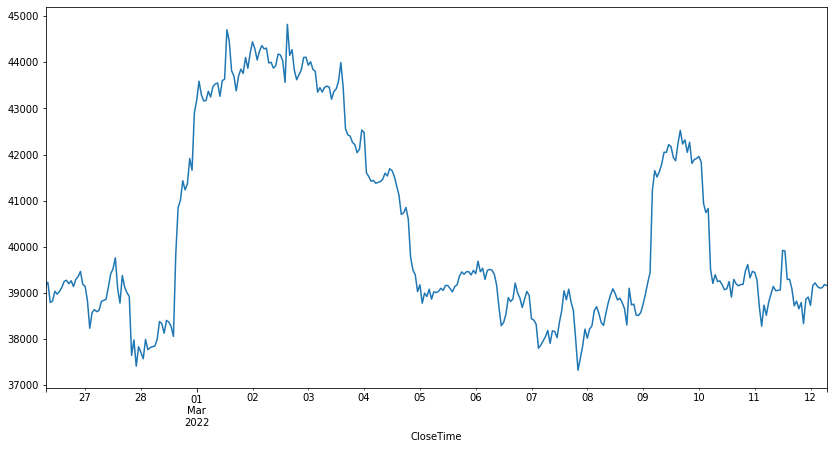

In [10]:
btc['ClosePrice'].plot(figsize = (14,7))

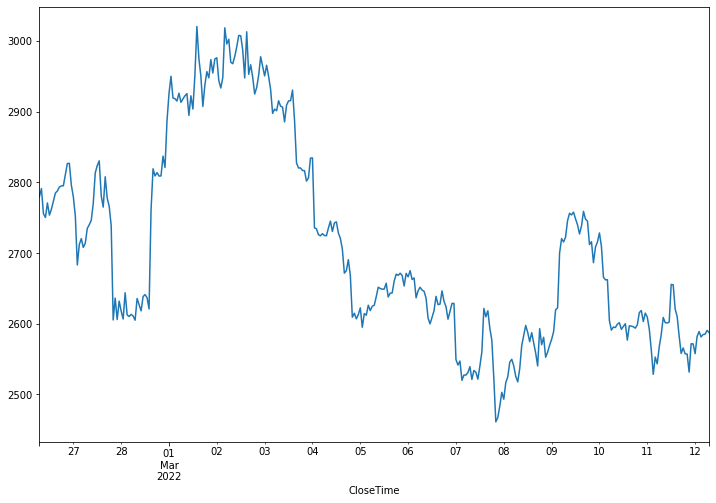

In [11]:
eth['ClosePrice'].plot(figsize=(12,8))

In [12]:
#Dynamic Plots with Bokeh
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

In [13]:
output_notebook()

In [15]:
p1 = figure(x_axis_type="datetime", title="Crypto Prices", width=800)
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'

p1.line(btc.index, btc['ClosePrice'], color='#f2a900', legend_label='Bitcoin')
#p1.line(eth.index, eth['ClosePrice'], color='#A6CEE3', legend_label='Ether')

p1.legend.location = "top_left"

show(p1)

In [16]:
#exporting data to excel
writer = pd.ExcelWriter('crypto.xlsx')

In [17]:
btc.to_excel(writer,sheet_name='Bitcoin')
eth.to_excel(writer,sheet_name='Ether')

In [18]:
writer.save()

# New Section